In [1]:
import pandas, numpy, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt

In [9]:
matplotlib.rcParams.update({'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':20, 
                            'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',
                            'figure.figsize':(12, 8), 'svg.fonttype' : 'none'})

In [3]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

In [4]:
%%time
# DL data ATG7 isoform expression
path = input_file_directory + "mefs/mef_jc10/exp1/"
red_path = 'jc10_exp1_red.csv'
green_path = 'jc10_exp1_green.csv'

df_aggregates= pandas.read_csv(path+red_path, sep = ";")
df_aggregates = df_aggregates.apply(lambda x: x.str.replace(',','.'))


df_monomeric= pandas.read_csv(path+green_path, sep = ";")
df_monomeric = df_monomeric.apply(lambda x: x.str.replace(',','.'))

df_aggregates

Wall time: 13 ms


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,condition,normal,ev,ev_dox,wt1,vsr1,wt2,vsr2
2,DMSO-FCCP,20.097,19.325,19.393,19.575,19.448,19.467,18.489
3,DMSO+FCCP,19.905,19.067,19.051,18.769,18.426,19.121,19.413
4,DMSO+FCCP,19.533,19.118,18.78,18.558,18.707,18.394,19.017
5,DMSO+FCCP,19.287,20.347,19.603,20.578,15.905,19.192,18.912
6,BAF-FCCP,20.846,20.268,21.232,20.037,20.733,20.622,20.761
7,BAF+FCCP,19.906,19.952,19.365,19.494,19.12,20.283,20.044
8,BAF+FCCP,19.376,18.825,19.479,20.059,20.595,19.662,19.3
9,BAF+FCCP,19.436,19.606,19.941,20.215,19.691,20.053,20.875


In [5]:
dfs = df_aggregates, df_monomeric
for df in dfs:
    #select column name and index label
    df.columns = df.iloc[1]
    df.columns.name = None 
    #drop the first useless rows + dmso/baf, positive control for FCCP
    df.drop(df.index[0:2], inplace = True)
    #reset index
    df.reset_index(drop = True, inplace = True)

#to numeric
df_monomeric.iloc[:,1:8] = df_monomeric.iloc[:,1:8].apply(pandas.to_numeric, errors='coerce', axis=1)
df_aggregates.iloc[:,1:8] = df_aggregates.iloc[:,1:8].apply(pandas.to_numeric, errors='coerce', axis=1)
df_aggregates

,condition,normal,ev,ev_dox,wt1,vsr1,wt2,vsr2
0,DMSO-FCCP,20.097,19.325,19.393,19.575,19.448,19.467,18.489
1,DMSO+FCCP,19.905,19.067,19.051,18.769,18.426,19.121,19.413
2,DMSO+FCCP,19.533,19.118,18.78,18.558,18.707,18.394,19.017
3,DMSO+FCCP,19.287,20.347,19.603,20.578,15.905,19.192,18.912
4,BAF-FCCP,20.846,20.268,21.232,20.037,20.733,20.622,20.761
5,BAF+FCCP,19.906,19.952,19.365,19.494,19.12,20.283,20.044
6,BAF+FCCP,19.376,18.825,19.479,20.059,20.595,19.662,19.3
7,BAF+FCCP,19.436,19.606,19.941,20.215,19.691,20.053,20.875


In [6]:
#create dataframe for ratio
df_ratio = df = pandas.DataFrame()
df_ratio = df_ratio.assign(condition = df_monomeric['condition'],
                           normal= df_monomeric['normal'] / df_aggregates['normal'],
                           ev= df_monomeric['ev'] / df_aggregates['ev'],
                           ev_dox= df_monomeric['ev_dox'] / df_aggregates['ev_dox'],
                           wt1= df_monomeric['wt1'] / df_aggregates['wt1'],
                           vsr1= df_monomeric['vsr1'] / df_aggregates['vsr1'],
                           wt2= df_monomeric['wt2'] / df_aggregates['wt2'],
                           vsr2= df_monomeric['vsr2'] / df_aggregates['vsr2'])
df_ratio

,condition,normal,ev,ev_dox,wt1,vsr1,wt2,vsr2
0,DMSO-FCCP,2.00299,2.29423,2.36658,2.32347,2.2879,2.47018,2.48353
1,DMSO+FCCP,2.43924,2.44842,2.48055,2.50621,2.49631,2.55609,2.32525
2,DMSO+FCCP,2.24804,2.26901,2.49989,2.3218,2.29176,2.38192,2.31093
3,DMSO+FCCP,2.25276,2.39854,2.42407,2.45068,2.41773,2.49734,2.36622
4,BAF-FCCP,2.64717,2.78523,2.58798,2.70709,2.66054,3.40685,2.72097
5,BAF+FCCP,2.82282,2.90562,2.83522,2.90366,3.02631,3.03205,2.99267
6,BAF+FCCP,2.89497,2.99368,2.90528,2.85573,2.74139,3.09221,2.82979
7,BAF+FCCP,2.89056,2.68469,2.75623,2.70848,2.70535,2.74592,2.75257


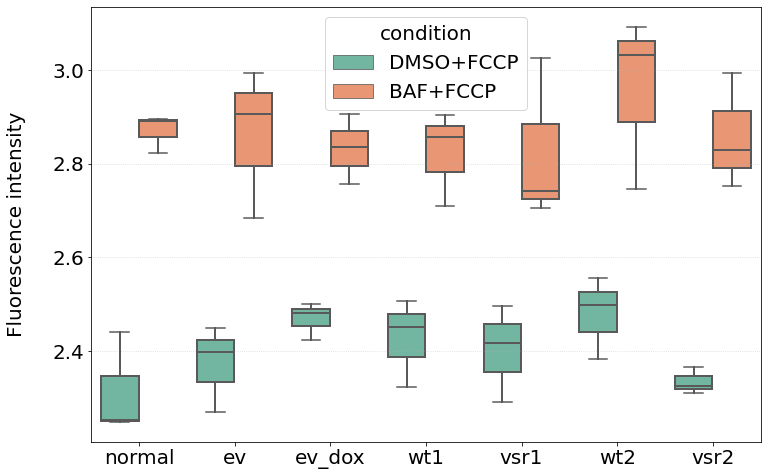

In [21]:
#without control
df_ratio_noctl = df_ratio[~df_ratio["condition"].str.contains('-FCCP')]

#melt wide to long
df_boxplot = df_ratio_noctl.melt(id_vars=["condition"], var_name="cell lines")

#graph with BAF or DMSO treatment separatly to have a better view of the cell lines
seaborn.boxplot(x="cell lines", y="value", hue = 'condition', palette = 'Set2', data = df_boxplot,
                boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2},
                showcaps=True, showfliers=False)

plt.ylabel('Fluorescence intensity\n')
plt.xlabel('')
plt.title('', x=.55)
print()

In [18]:
#Distribution: Stats for all 
all_data = [[df_ratio, 'Ratio low/high mitochondria membrane potential', '(ratio 520/590 nm)']]

column_name = df_aggregates.keys()
for data_ in all_data:
    Data = data_[0]
    info = data_[1]
    info_fluo = data_[2]  
    print(info)
    
    #separation of DMSO and BAF
    df_dmso = Data[Data['condition'].str.startswith('DMSO')]
    df2_baf = Data[Data['condition'].str.startswith('BAF')]

    dfs_conditions = [[df_dmso, 'with DMSO'], [df2_baf, 'with BAF']]
    for df_ in dfs_conditions:
        data_drug = df_[0]
        drug_info = df_[1]
        print(drug_info.upper())
        
        # Mann-Whitney analysis 
        #EV vs WT1
        statistic, pvalue = scipy.stats.mannwhitneyu(data_drug[column_name[3]], data_drug[column_name[4]])
        Pvalue = "{:.3E}".format(pvalue)
        print(column_name[3], "and", column_name[4], drug_info, 'pvalue is', Pvalue)
        
        #EV vs WT1
        statistic, pvalue = scipy.stats.mannwhitneyu(data_drug[column_name[3]], data_drug[column_name[6]])
        Pvalue = "{:.3E}".format(pvalue)
        print(column_name[3], "and", column_name[6], drug_info, 'pvalue is', Pvalue)
        
         #EV vs WT1
        statistic, pvalue = scipy.stats.mannwhitneyu(data_drug[column_name[4]], data_drug[column_name[6]])
        Pvalue = "{:.3E}".format(pvalue)
        print(column_name[4], "and", column_name[6], drug_info, 'pvalue is', Pvalue)
        print()

Ratio low/high mitochondria membrane potential
WITH DMSO
ev_dox and wt1 with DMSO pvalue is 3.325E-01
ev_dox and wt2 with DMSO pvalue is 3.325E-01
wt1 and wt2 with DMSO pvalue is 1.562E-01

WITH BAF
ev_dox and wt1 with BAF pvalue is 4.426E-01
ev_dox and wt2 with BAF pvalue is 9.697E-02
wt1 and wt2 with BAF pvalue is 5.618E-02



In [ ]:
Data